In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [20]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.540238,0.836703,-5.611991e-08,0.502042,0.788345,-0.030284,0.492007,0.704742,-0.045479,0.522103,...,0.633581,0.651017,-0.055764,0.613536,0.692968,-0.046072,0.600677,0.724364,-0.030053,1
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.505589,0.592764,-2.734791e-07,0.551463,0.564139,-0.012462,0.585479,0.502010,-0.013459,0.575783,...,0.472137,0.447398,-0.011560,0.480904,0.485578,-0.003483,0.480654,0.505868,0.006363,stop
695,0.495873,0.588724,-2.757460e-07,0.542876,0.563540,-0.011893,0.575915,0.498117,-0.011555,0.566011,...,0.462607,0.446815,-0.011840,0.470884,0.485175,-0.003963,0.469875,0.504842,0.005839,stop
696,0.486599,0.583982,-2.688052e-07,0.533125,0.558431,-0.012171,0.567302,0.493409,-0.011963,0.559363,...,0.454154,0.439437,-0.012113,0.462709,0.477948,-0.004049,0.462429,0.497747,0.005910,stop
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,stop


In [21]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.540238,0.836703,-5.611991e-08,0.502042,0.788345,-0.030284,0.492007,0.704742,-0.045479,0.522103,...,0.633581,0.651017,-0.055764,0.613536,0.692968,-0.046072,0.600677,0.724364,-0.030053,1
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,0.505589,0.592764,-2.734791e-07,0.551463,0.564139,-0.012462,0.585479,0.502010,-0.013459,0.575783,...,0.472137,0.447398,-0.011560,0.480904,0.485578,-0.003483,0.480654,0.505868,0.006363,stop
695,0.495873,0.588724,-2.757460e-07,0.542876,0.563540,-0.011893,0.575915,0.498117,-0.011555,0.566011,...,0.462607,0.446815,-0.011840,0.470884,0.485175,-0.003963,0.469875,0.504842,0.005839,stop
696,0.486599,0.583982,-2.688052e-07,0.533125,0.558431,-0.012171,0.567302,0.493409,-0.011963,0.559363,...,0.454154,0.439437,-0.012113,0.462709,0.477948,-0.004049,0.462429,0.497747,0.005910,stop
697,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,stop


In [22]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (699, 63)
Labels shape = (699,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# svm = SVC(C=10, gamma=0.1, kernel='rbf')
# svm.fit(x_train, y_train)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
y_pred = clf.predict(x_test)
y_train_score = clf.predict(x_train)
y_pred

array(['prev', 'start', '1', 'prev', '1', '2', '3', '1', '3', '2', 'stop',
       'stop', '3', 'next', '1', 'next', 'stop', 'prev', '1', 'start',
       'prev', 'stop', 'next', 'stop', 'start', 'next', 'next', 'start',
       'stop', '1', 'next', 'start', '1', '1', '2', 'stop', 'prev', '3',
       'next', 'next', 'next', '1', 'prev', '2', '3', '3', 'stop',
       'start', 'prev', 'start', 'next', 'prev', 'next', '3', '3', 'prev',
       'prev', 'start', '1', '1', 'next', '3', 'next', 'prev', '1',
       'start', '3', 'prev', 'prev', 'stop', 'stop', '1', '1', 'prev',
       'stop', '3', 'prev', 'start', '3', '3', 'stop', '3', 'next',
       'prev', 'stop', 'stop', '2', 'stop', 'prev', '3', '2', '3', 'prev',
       '3', '1', 'start', '1', '2', '2', '3', '2', 'stop', '1', '1', '1',
       'start', 'stop', '3', 'prev', 'stop', 'prev', 'next', 'next',
       'start', 'next', '2', 'prev', 'start', 'next', '3', '1', '2', '1',
       '1', 'start', 'stop', '1', '1', 'next', 'prev', '3', '1', 'p

In [25]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_train, y_train_score)
f1, recall, precision, accuracy,accuracy2

(0.9812558735828407,
 0.9809523809523809,
 0.9829573934837094,
 0.9809523809523809,
 0.9631901840490797)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

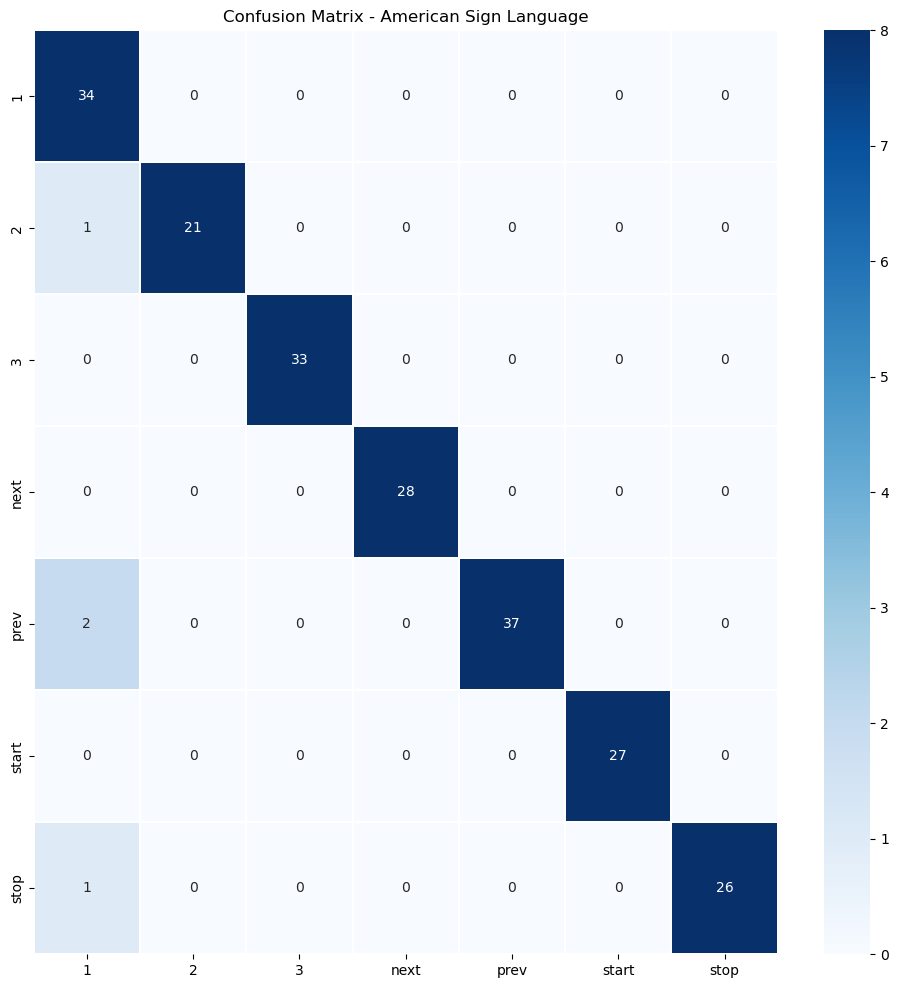

In [26]:
labels = sorted(list(set(df['Output'])))
# labels = [x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [27]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(clf,f)